In [5]:
### NLP_Project_8_3rd_Topic_Mod_News_Arti_Revised.ipynb

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
!pip install gensim

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
news = pd.read_csv('/content/drive/My Drive/NLP/news_articles_1000_train.csv',encoding='latin-1')
news_test = pd.read_csv('/content/drive/My Drive/NLP/news_articles_20_test.csv',encoding='latin-1')
news.head(50)

Unnamed: 0  ...                                          body_text
0            0  ...  By Reuters Staff 2 MIN READ SHANGHAI/HONG KONG...
1            1  ...  By Reuters Staff 3 MIN READ MOSCOW (Reuters) -...
2            2  ...  By Reuters Staff 2 MIN READ FILE PHOTO: The co...
3            3  ...  By Danilo Masoni 4 MIN READ MILAN (Reuters) - ...
4            4  ...  By Alex Lawler 2 MIN READ FILE PHOTO: the sun ...
5            5  ...  By Reuters Staff 1 MIN READ FILE PHOTO: Fuel p...
6            6  ...  By Colm Fulton 3 MIN READ STOCKHOLM (Reuters) ...
7            7  ...  By Samuel Shen, Scott Murdoch 4 MIN READ SHANG...
8            8  ...  By Reuters Staff 2 MIN READ FILE PHOTO: The me...
9            9  ...  By Tina Bellon, Noel Randewich, Akanksha Rana ...
10          10  ...  By Reuters Staff 1 MIN READ FILE PHOTO: The Pa...
11          11  ...  By Byron Kaye 2 MIN READ FILE PHOTO: The logo ...
12          12  ...  By Reuters Staff 1 MIN READ FILE PHOTO: HSBC's...
13          13  ...  By Tommy Wilkes 5 MIN READ LONDON (Reuters) - ...
14          14  ...  By Reuters Staff 1 MIN READ Slideshow ( 4 imag...
15          15  ...  By Sankalp Phartiyal 3 MIN READ NEW DELHI (Reu...
16          16  ...  By Reuters Staff 3 MIN READ (Reuters) - Relian...
17          17  ...  By Reuters Staff 1 MIN READ FILE PHOTO: Visito...
18          18  ...  By Reuters Staff 2 MIN READ FILE PHOTO: The lo...
19          19  ...  By Josh Horwitz, Brenda Goh 3 MIN READ SHANGHA...
20          20  ...  By John Miller, Emilio Parodi 5 MIN READ ZURIC...
21          21  ...  By Hyunjoo Jin, Yilei Sun 4 MIN READ SEOUL/SHA...
22          22  ...  By Reuters Staff 1 MIN READ FILE PHOTO: Two me...
23          23  ...  By Sankalp Phartiyal, Nupur Anand 2 MIN READ N...
24          24  ...  By Nikhil Nainan 4 MIN READ BENGALURU, India (...
25          25  ...  By Sam Nussey 2 MIN READ FILE PHOTO: Sony Corp...
26          26  ...  By Reuters Staff 2 MIN READ SHANGHAI (Reuters)...
27          27  ...  By Andrea Shalal, Steve Holland 3 MIN READ WAS...
28          28  ...  By David Shepardson, Tracy Rucinski 3 MIN READ...
29          29  ...  By Reuters Staff 1 MIN READ FILE PHOTO: United...
30          30  ...  By Reuters Staff 2 MIN READ FILE PHOTO: An emp...
31          31  ...  By Richa Naidu, Nivedita Balu 3 MIN READ (Reut...
32          32  ...  By David Shepardson, Diane Bartz 3 MIN READ WA...
33          33  ...  By Erwin Seba 3 MIN READ HOUSTON (Reuters) - L...
34          34  ...  By Herbert Lash 4 MIN READ (Reuters) - Wall St...
35          35  ...  By Katanga Johnson 5 MIN READ WASHINGTON (Reut...
36          36  ...  By Reuters Staff 2 MIN READ FILE PHOTO: A Ford...
37          37  ...  By Rodrigo Campos 3 MIN READ NEW YORK (Reuters...
38          38  ...  By Karl Plume 2 MIN READ (Reuters) - U.S. pork...
39          39  ...  By Reuters Staff 1 MIN READ The 3M Global Head...
40          40  ...  By Dan Burns, Howard Schneider 6 MIN READ (Reu...
41          41  ...  By Reuters Staff 2 MIN READ FILE PHOTO: CEO an...
42          42  ...  By Reuters Staff 2 MIN READ FILE PHOTO: Carson...
43          43  ...  By Laura Sanicola 2 MIN READ FILE PHOTO: the s...
44          44  ...  By Lisa Richwine 2 MIN READ LOS ANGELES (Reute...
45          45  ...  By Sheila Dang 5 MIN READ (Reuters) - Even as ...
46          46  ...  By Imani Moise, Jessica DiNapoli, Ross Kerber ...
47          47  ...  By Tanishaa Nadkar 3 MIN READ (Reuters) - Prem...
48          48  ...  By David Shepardson 2 MIN READ WASHINGTON (Reu...
49          49  ...  By Richa Naidu, Aishwarya Venugopal 3 MIN READ...

[50 rows x 3 columns]

In [10]:
news['body_text'][0]

"By Reuters Staff 2 MIN READ SHANGHAI/HONG KONG (Reuters) - Chinaâ\x80\x99s Ant Group submitted documents to the securities regulator for registration of the Shanghai portion of its IPO, the cityâ\x80\x99s bourse said late on Tuesday, moving a step closer to a planned dual-listing expected to be worth about $35 billion. FILE PHOTO: An employee stands next to the logo of Ant Financial Services Group, Alibaba's financial affiliate, at its headquarters in Hangzhou, Zhejiang province, China January 24, 2018. REUTERS/Shu Zhang The financial technology firm, backed by Chinaâ\x80\x99s biggest e-commerce company Alibaba Group, plans to list simultaneously on Shanghaiâ\x80\x99s Nasdaq-style STAR Market and in Hong Kong, in what sources have said could be the worldâ\x80\x99s largest IPO and come as soon as October. The Shanghai Stock Exchange approved the listing plan last week. The company is seeking to raise about $35 billion in the IPO after assessing early investor interest and based on a hi

In [11]:
#Data Preprocessing
#Tokenization
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [12]:
WordNetLemmatizer().lemmatize('runs')

'run'

In [13]:
# writing function for the entire dataset
import pandas as pd
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [14]:
# Preprocessing the whole document
processed_docs = []
for doc in news['body_text']:
    processed_docs.append(preprocess(doc))

In [15]:
processed_docs

[['reuter',
  'staff',
  'read',
  'shanghai',
  'hong',
  'kong',
  'reuter',
  'chinaâ',
  'group',
  'submit',
  'document',
  'secur',
  'regul',
  'registr',
  'shanghai',
  'portion',
  'cityâ',
  'bours',
  'say',
  'late',
  'tuesday',
  'move',
  'step',
  'closer',
  'plan',
  'dual',
  'list',
  'expect',
  'worth',
  'billion',
  'file',
  'photo',
  'employe',
  'stand',
  'logo',
  'financi',
  'servic',
  'group',
  'alibaba',
  'financi',
  'affili',
  'headquart',
  'hangzhou',
  'zhejiang',
  'provinc',
  'china',
  'januari',
  'reuter',
  'zhang',
  'financi',
  'technolog',
  'firm',
  'back',
  'chinaâ',
  'biggest',
  'commerc',
  'compani',
  'alibaba',
  'group',
  'plan',
  'list',
  'simultan',
  'shanghaiâ',
  'nasdaq',
  'style',
  'star',
  'market',
  'hong',
  'kong',
  'sourc',
  'say',
  'worldâ',
  'largest',
  'come',
  'soon',
  'octob',
  'shanghai',
  'stock',
  'exchang',
  'approv',
  'list',
  'plan',
  'week',
  'compani',
  'seek',
  'rais',


In [16]:
len(processed_docs)

1000

In [17]:
# print some tokenized and preprocessed doc.
print(processed_docs[:2])

[['reuter', 'staff', 'read', 'shanghai', 'hong', 'kong', 'reuter', 'chinaâ', 'group', 'submit', 'document', 'secur', 'regul', 'registr', 'shanghai', 'portion', 'cityâ', 'bours', 'say', 'late', 'tuesday', 'move', 'step', 'closer', 'plan', 'dual', 'list', 'expect', 'worth', 'billion', 'file', 'photo', 'employe', 'stand', 'logo', 'financi', 'servic', 'group', 'alibaba', 'financi', 'affili', 'headquart', 'hangzhou', 'zhejiang', 'provinc', 'china', 'januari', 'reuter', 'zhang', 'financi', 'technolog', 'firm', 'back', 'chinaâ', 'biggest', 'commerc', 'compani', 'alibaba', 'group', 'plan', 'list', 'simultan', 'shanghaiâ', 'nasdaq', 'style', 'star', 'market', 'hong', 'kong', 'sourc', 'say', 'worldâ', 'largest', 'come', 'soon', 'octob', 'shanghai', 'stock', 'exchang', 'approv', 'list', 'plan', 'week', 'compani', 'seek', 'rais', 'billion', 'assess', 'earli', 'investor', 'base', 'higher', 'valuat', 'billion', 'sourc', 'direct', 'knowledg', 'matter', 'tell', 'reuter', 'declin', 'comment', 'separ', 

# Feature Extraction

**Create Dictionary of tokens with words(values) and keys(Ids)**

In [18]:
# Making a dictionary cotaining words and their integer ids
dictionary = gensim.corpora.Dictionary(processed_docs)

In [19]:
print (dictionary)

Dictionary(12474 unique tokens: ['affili', 'aim', 'alibaba', 'anantharaman', 'antâ']...)


In [20]:
#Lets see if dictionary created succesfully
# Printing first 20 items in dictionary
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 affili
1 aim
2 alibaba
3 anantharaman
4 antâ
5 approv
6 assess
7 asset
8 back
9 base
10 biggest
11 billion
12 bours
13 china
14 chinaamc
15 chinaâ
16 chines
17 cityâ
18 closer
19 combin
20 come


In [21]:
#remove rare and repeatative words
dictionary.filter_extremes()

In [22]:
print (dictionary)

Dictionary(3913 unique tokens: ['affili', 'aim', 'alibaba', 'anantharaman', 'approv']...)


# Bag-of-Words Technique

Create a doc. terms freq. matrix (it shows word's freq and its id)

In [23]:
# Applying Bag-of-Words for each document (a list of words)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print("Bag-of-Words of our sample document: ", bow_corpus[0])

Bag-of-Words of our sample document:  [(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 1), (9, 1), (10, 6), (11, 1), (12, 3), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 6), (34, 1), (35, 3), (36, 1), (37, 1), (38, 1), (39, 2), (40, 3), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 3), (48, 1), (49, 1), (50, 7), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 2), (61, 2), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 3), (102, 1), (103, 1)]


In [24]:
#preview 
document_num = 0
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

Word 0 ("affili") appears 1 time.
Word 1 ("aim") appears 1 time.
Word 2 ("alibaba") appears 2 time.
Word 3 ("anantharaman") appears 1 time.
Word 4 ("approv") appears 1 time.
Word 5 ("assess") appears 1 time.
Word 6 ("asset") appears 4 time.
Word 7 ("back") appears 1 time.
Word 8 ("base") appears 1 time.
Word 9 ("biggest") appears 1 time.
Word 10 ("billion") appears 6 time.
Word 11 ("bours") appears 1 time.
Word 12 ("china") appears 3 time.
Word 13 ("chinaâ") appears 2 time.
Word 14 ("chines") appears 2 time.
Word 15 ("cityâ") appears 1 time.
Word 16 ("closer") appears 1 time.
Word 17 ("combin") appears 1 time.
Word 18 ("come") appears 1 time.
Word 19 ("comment") appears 1 time.
Word 20 ("commerc") appears 1 time.
Word 21 ("declin") appears 1 time.
Word 22 ("direct") appears 1 time.
Word 23 ("document") appears 1 time.
Word 24 ("dual") appears 1 time.
Word 25 ("earli") appears 1 time.
Word 26 ("employe") appears 1 time.
Word 27 ("exchang") appears 1 time.
Word 28 ("exist") appears 1 tim

**TFIDF**

Now apply TFIDF BOW techniques to Doc. term Freq Matrix

In [25]:
# Importing the libraries
from gensim import corpora, models
from pprint import pprint


In [26]:
# Creating a TF-IDF model
tdidf = models.TfidfModel(corpus = bow_corpus)

In [27]:
# Applying TF-IDF to the entire corpus
tdidf_corpus = tdidf[bow_corpus]
print("1st TD-IDF: ", tdidf_corpus[0])

1st TD-IDF:  [(0, 0.09534907465398947), (1, 0.055867239188602515), (2, 0.19628910342068873), (3, 0.09169044345742418), (4, 0.05072149778800783), (5, 0.07468072729242368), (6, 0.22051732548294464), (7, 0.06380319858880408), (8, 0.030212723932874348), (9, 0.043643517646615976), (10, 0.12696779661300372), (11, 0.10929967566039318), (12, 0.11353568767443457), (13, 0.10835967967619192), (14, 0.09005295815897695), (15, 0.11776504265319362), (16, 0.0875523187203193), (17, 0.06799123737796828), (18, 0.02929816121155158), (19, 0.03134106656386996), (20, 0.056628827193241076), (21, 0.0330931174411954), (22, 0.05260448578718933), (23, 0.07761459612867638), (24, 0.1070375721291398), (25, 0.04583110267707241), (26, 0.05464983783019659), (27, 0.04616074857354562), (28, 0.060853101291743664), (29, 0.024714039013268373), (30, 0.09927935232358619), (31, 0.030297640384840525), (32, 0.041232610348894375), (33, 0.2418415700284215), (34, 0.10131380220813231), (35, 0.08293310821212618), (36, 0.1145957921554

In [28]:
# Preview TF-IDF for first document
count = 0
for doc in tdidf_corpus:
    pprint(doc)
    count += 1
    if count ==2:
        break

[(0, 0.09534907465398947),
 (1, 0.055867239188602515),
 (2, 0.19628910342068873),
 (3, 0.09169044345742418),
 (4, 0.05072149778800783),
 (5, 0.07468072729242368),
 (6, 0.22051732548294464),
 (7, 0.06380319858880408),
 (8, 0.030212723932874348),
 (9, 0.043643517646615976),
 (10, 0.12696779661300372),
 (11, 0.10929967566039318),
 (12, 0.11353568767443457),
 (13, 0.10835967967619192),
 (14, 0.09005295815897695),
 (15, 0.11776504265319362),
 (16, 0.0875523187203193),
 (17, 0.06799123737796828),
 (18, 0.02929816121155158),
 (19, 0.03134106656386996),
 (20, 0.056628827193241076),
 (21, 0.0330931174411954),
 (22, 0.05260448578718933),
 (23, 0.07761459612867638),
 (24, 0.1070375721291398),
 (25, 0.04583110267707241),
 (26, 0.05464983783019659),
 (27, 0.04616074857354562),
 (28, 0.060853101291743664),
 (29, 0.024714039013268373),
 (30, 0.09927935232358619),
 (31, 0.030297640384840525),
 (32, 0.041232610348894375),
 (33, 0.2418415700284215),
 (34, 0.10131380220813231),
 (35, 0.08293310821212618)

# Modeling

In [29]:
lda_model =  gensim.models.LdaMulticore(tdidf_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [30]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.015*"huawei" + 0.005*"equip" + 0.004*"berkshir" + 0.003*"smic" + 0.003*"divers" + 0.003*"flipkart" + 0.003*"huaweiâ" + 0.002*"peso" + 0.002*"buffett" + 0.002*"supermarket"


Topic: 1 
Words: 0.020*"tiktok" + 0.019*"byted" + 0.012*"oracl" + 0.010*"nikola" + 0.009*"trump" + 0.006*"tiktokâ" + 0.005*"short" + 0.005*"white" + 0.005*"hous" + 0.004*"bytedanceâ"


Topic: 2 
Words: 0.007*"vaccin" + 0.006*"astrazeneca" + 0.006*"delta" + 0.005*"trial" + 0.004*"birmingham" + 0.004*"french" + 0.002*"shuttlesworth" + 0.002*"nouvelag" + 0.002*"elijah" + 0.002*"vidalon"


Topic: 3 
Words: 0.003*"insolv" + 0.003*"imposs" + 0.003*"drink" + 0.002*"starbuck" + 0.002*"coffe" + 0.001*"elliott" + 0.001*"beverag" + 0.001*"davey" + 0.001*"benoit" + 0.001*"cabinet"


Topic: 4 
Words: 0.009*"airlin" + 0.003*"job" + 0.003*"worker" + 0.003*"airport" + 0.003*"flight" + 0.003*"travel" + 0.003*"american" + 0.003*"rate" + 0.003*"unemploy" + 0.002*"furlough"


Topic: 5 
Words: 0.008*"indian" + 0.007*

# Testing Model

Testing Model with Un-seen data 

In [31]:
len(news_test['body_text'])

20

In [32]:
## test with single data
news_test['body_text'][1]

"By Reuters Staff 2 MIN READ FILE PHOTO: The logo of India's e-commerce firm Flipkart is seen in this illustration picture taken January 29, 2019. REUTERS/Danish Siddiqui/Illustration/File Photo BENGALURU (Reuters) - Indiaâ\x80\x99s Flipkart launched an online wholesale service for mom-and-pop stores and other small businesses on Wednesday, as the Walmart-owned firm seeks to better compete with Amazon and other players in a battleground market for e-commerce. â\x80\x9cFlipkart Wholesaleâ\x80\x9d, also available as a smartphone app, currently sells apparel in the cities of Bengaluru, Gurugram and Delhi. It plans to expand to 20 more cities and also offer groceries by the end of the year, Flipkart said in a statement. It also hopes to list more than 200,000 products in two months and have 50 brands and 250 local manufacturers in the next few days, the company added. Flipkart, majority-owned by Walmart Inc, bought the U.S. retail giantâ\x80\x99s wholesale business in India in July. Amazon

In [33]:
## Test with all test data 
bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][1]))

for index, score in sorted(lda_model[bow_vector]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 30)))

Score: 0.08729144930839539	 Topic: 0.015*"huawei" + 0.005*"equip" + 0.004*"berkshir" + 0.003*"smic" + 0.003*"divers" + 0.003*"flipkart" + 0.003*"huaweiâ" + 0.002*"peso" + 0.002*"buffett" + 0.002*"supermarket" + 0.002*"chip" + 0.002*"uber" + 0.002*"grab" + 0.002*"poland" + 0.002*"sonya" + 0.002*"telecom" + 0.002*"vision" + 0.002*"hathaway" + 0.002*"rubio" + 0.002*"smartphon" + 0.002*"vendor" + 0.002*"brazilian" + 0.002*"farmer" + 0.002*"draft" + 0.001*"coat" + 0.001*"societ" + 0.001*"buffettâ" + 0.001*"carl" + 0.001*"warren" + 0.001*"blackrock"
Score: 0.06424126774072647	 Topic: 0.008*"indian" + 0.007*"india" + 0.006*"relianc" + 0.004*"delhi" + 0.003*"indiaâ" + 0.003*"rupe" + 0.003*"ericsson" + 0.003*"mumbai" + 0.003*"sankalp" + 0.003*"phartiy" + 0.003*"sar" + 0.002*"permit" + 0.002*"paulo" + 0.002*"custodi" + 0.002*"pork" + 0.002*"chees" + 0.002*"meat" + 0.001*"silver" + 0.001*"lake" + 0.001*"exempt" + 0.001*"brazilian" + 0.001*"ambani" + 0.001*"flipkart" + 0.001*"grate" + 0.001*"plays

In [34]:
# for i in range(len(news_test['body_text'])):
#   bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][i]))
#   for index, score in sorted(lda_model[bow_vector]):
#     print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 20)))

In [35]:
#print(lda_model.get_document_topics(bow_vector))

In [36]:
for index, score in sorted(lda_model.get_document_topics(bow_vector)):
    print("Score: {}\t Matched with Topic: (\"{}\") with words freq. :[{}]".format(score,index,lda_model.print_topic(index, 30)))

Score: 0.08729052543640137	 Matched with Topic: ("0") with words freq. :[0.015*"huawei" + 0.005*"equip" + 0.004*"berkshir" + 0.003*"smic" + 0.003*"divers" + 0.003*"flipkart" + 0.003*"huaweiâ" + 0.002*"peso" + 0.002*"buffett" + 0.002*"supermarket" + 0.002*"chip" + 0.002*"uber" + 0.002*"grab" + 0.002*"poland" + 0.002*"sonya" + 0.002*"telecom" + 0.002*"vision" + 0.002*"hathaway" + 0.002*"rubio" + 0.002*"smartphon" + 0.002*"vendor" + 0.002*"brazilian" + 0.002*"farmer" + 0.002*"draft" + 0.001*"coat" + 0.001*"societ" + 0.001*"buffettâ" + 0.001*"carl" + 0.001*"warren" + 0.001*"blackrock"]
Score: 0.06424785405397415	 Matched with Topic: ("5") with words freq. :[0.008*"indian" + 0.007*"india" + 0.006*"relianc" + 0.004*"delhi" + 0.003*"indiaâ" + 0.003*"rupe" + 0.003*"ericsson" + 0.003*"mumbai" + 0.003*"sankalp" + 0.003*"phartiy" + 0.003*"sar" + 0.002*"permit" + 0.002*"paulo" + 0.002*"custodi" + 0.002*"pork" + 0.002*"chees" + 0.002*"meat" + 0.001*"silver" + 0.001*"lake" + 0.001*"exempt" + 0.001*"

In [37]:
for i in range(len(news_test['body_text'])):
  bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][i]))
  for index, score in sorted(lda_model.get_document_topics(bow_vector)):
    print("Score: {}\t Matched with Topic: (\"{}\") with words freq. :[{}]".format(score,index,lda_model.print_topic(index, 30)))

Score: 0.9865666627883911	 Matched with Topic: ("6") with words freq. :[0.003*"bank" + 0.003*"china" + 0.003*"chines" + 0.003*"boe" + 0.003*"vehicl" + 0.002*"deal" + 0.002*"court" + 0.002*"order" + 0.002*"rule" + 0.002*"tiktok" + 0.002*"state" + 0.002*"beij" + 0.002*"secur" + 0.002*"comment" + 0.002*"govern" + 0.002*"oper" + 0.002*"foreign" + 0.002*"wechat" + 0.002*"electr" + 0.002*"user" + 0.002*"commerc" + 0.002*"execut" + 0.002*"investig" + 0.002*"regul" + 0.002*"ministri" + 0.002*"unit" + 0.002*"propos" + 0.002*"chinaâ" + 0.002*"amazon" + 0.002*"volkswagen"]
Score: 0.08729126304388046	 Matched with Topic: ("0") with words freq. :[0.015*"huawei" + 0.005*"equip" + 0.004*"berkshir" + 0.003*"smic" + 0.003*"divers" + 0.003*"flipkart" + 0.003*"huaweiâ" + 0.002*"peso" + 0.002*"buffett" + 0.002*"supermarket" + 0.002*"chip" + 0.002*"uber" + 0.002*"grab" + 0.002*"poland" + 0.002*"sonya" + 0.002*"telecom" + 0.002*"vision" + 0.002*"hathaway" + 0.002*"rubio" + 0.002*"smartphon" + 0.002*"vendor"

Obs:- Obove we can clearly see that all doc. form testing dataset has been categorized w.r.t its topic using LDA Model 

In [38]:
# lda=gensim.models.ldamodel.LdaModel(bow_corpus, 
#                                    num_topics = 4, 
#                                    id2word = dictionary,                                    
#                                    passes = 10)

In [39]:
#lda.print_topics(num_words=10)

In [40]:
#print(lda.get_document_topics(bow_vector))

In [41]:
# for i in range(len(news_test['body_text'])):
#   bow_vector = dictionary.doc2bow(preprocess(news_test['body_text'][i]))
#   print(lda.get_document_topics(bow_vector))

**Compute Model Perplexity and Coherence Score**

In [42]:
# Compute Perplexity
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(tdidf_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.967652333879977

Coherence Score:  0.49328030520730326


In [43]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 552kB 17.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=49adcd326ac93a456dfcbca6c8721f2e6b414353a19cdf5416fb94cf06a132c2
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7d2a1090669fabff6015d9c2268b1d9136d0d938ab76d7b0c297e01b0e53aa42
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


**Visualize the topics-keywords**

examine the produced topics and the associated keywords with help of tool 'pyLDAv, is package’s interactive chart and is designed to work well with jupyter notebooks.

Note: if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

In [44]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tdidf_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.130767 -0.008207       1        1  40.732693
6      0.004353  0.139733       2        1  33.227627
4      0.065859 -0.037475       3        1  12.531998
1     -0.061005 -0.015943       4        1   2.896383
9     -0.040721 -0.017093       5        1   2.624079
0     -0.027273 -0.016970       6        1   1.965717
2     -0.014386 -0.012490       7        1   1.802121
7     -0.020513 -0.008091       8        1   1.624943
5     -0.022900 -0.014120       9        1   1.419763
3     -0.014181 -0.009344      10        1   1.174679, topic_info=        Term       Freq      Total Category  logprob  loglift
1529  tiktok  11.000000  11.000000  Default  30.0000  30.0000
1508   byted   6.000000   6.000000  Default  29.0000  29.0000
707    trump   8.000000   8.000000  Default  28.0000  28.0000
525   airlin  12.000000  12.000000  Default  27.0000  27.0000
1519   oracl   4.000000   4.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
1343  surviv   0.060563   1.701181  Topic10  -7.3840   1.1088
1205    item   0.060979   1.769729  Topic10  -7.3772   1.0761
2618  holton   0.062121   1.927046  Topic10  -7.3586   1.0095
335    grind   0.059715   1.637465  Topic10  -7.3981   1.1329
2619    kate   0.060661   2.097829  Topic10  -7.3824   0.9008

[506 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1473      1  0.221191    acquisit
1473      2  0.663573    acquisit
1473      5  0.221191    acquisit
913       2  0.700409    advertis
1918      3  0.671374  agricultur
...     ...       ...         ...
2613      4  0.987620     yingzhi
280       1  0.715066        york
280       2  0.178767        york
280       3  0.089383        york
1353      2  0.830184      zurich

[479 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 2, 10, 1, 3, 8, 6, 4])

**Building LDA Mallet Model**

Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself.

In [45]:
#import zipfile
#!unzip '/content/drive/My Drive/NLP/mallet-2.0.8.zip' -d '/content/drive/My Drive/NLP'

In [62]:
# import os
# from gensim.models.wrappers import LdaMallet
# mallet_path ='/content/drive/My Drive/NLP/mallet-2.0.8/bin/mallet' # update this path
# ldamallet =LdaMallet(mallet_path, corpus=tdidf_corpus, num_topics=10, id2word=dictionary)

**Now Find the optimal number of topics for LDA**

To find optimal number of topics is, to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

In [67]:
#texts = processed_docs
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [68]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=tdidf_corpus, texts=processed_docs, start=2, limit=40, step=6)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

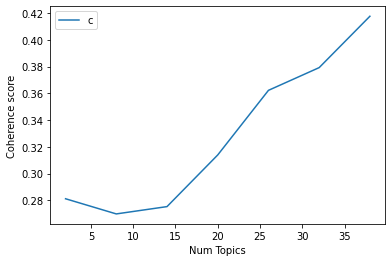

In [69]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [70]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2812
Num Topics = 8  has Coherence Value of 0.2698
Num Topics = 14  has Coherence Value of 0.2753
Num Topics = 20  has Coherence Value of 0.3139
Num Topics = 26  has Coherence Value of 0.3622
Num Topics = 32  has Coherence Value of 0.3792
Num Topics = 38  has Coherence Value of 0.4176


Obs - 
1) If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.

So for further steps I will choose the model with '10' topics.